# Breast Cancer Classification
<img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large14.jpg">

## Main Libraries and Set-ups

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

UCI ML Breast Cancer Wisconsin (Diagnostic) datasets. https://goo.gl/U2Uwz2

Dataset Information
- Number of instances: 569
- Number of attributes: 32 (ID, diagnosis, 30 real-valued input features) 

Attribute information
- 1) ID number
- 2) Diagnosis (M = malignant, B = benign) 
- 3-32) Ten real-valued features are computed for each cell nucleus:
 - a) radius (mean of distances from center to points on the perimeter) 
 - b) texture (standard deviation of gray-scale values)
 - c) perimeter
 - d) area
 - e) smoothness (local variation in radius lengths)
 - f) compactness (perimeter^2 / area - 1.0)
 - g) concavity (severity of concave portions of the contour)
 - h) concave points (number of concave portions of the contour) i) symmetry
 - j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed on original website contain detailed descriptions of how these features are computed.

**Note**: The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, `resulting in 30 features`. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

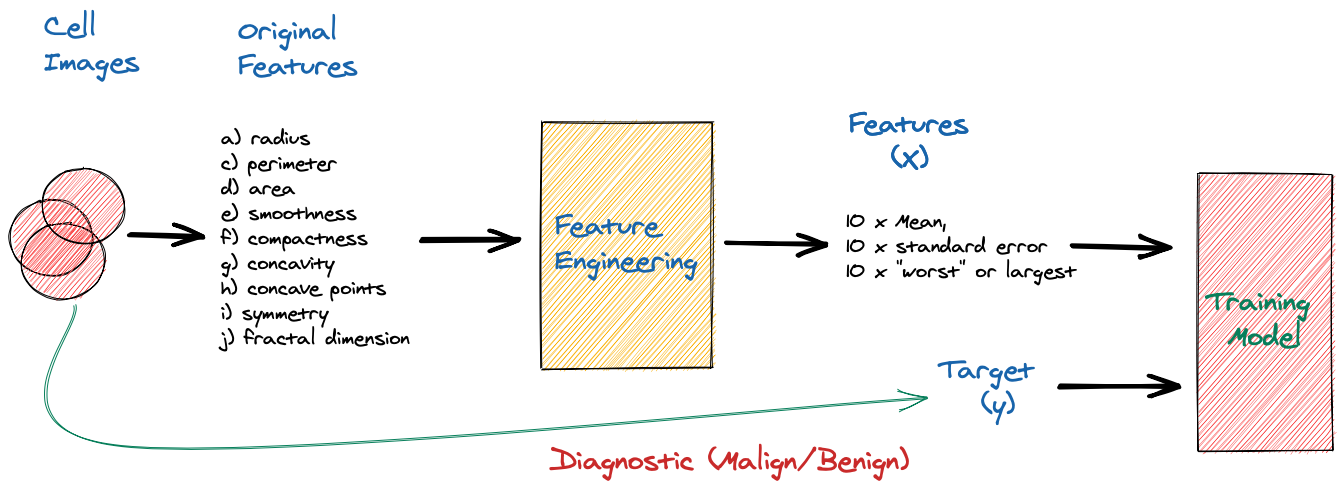

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
labels = ["ID", "Diagnosis",
          "radius (mean)", "texture (mean)", "perimeter (mean)", "area (mean)", 
          "smoothness (mean)", "compactness (mean)", "concavity (mean)", 
          "concave points (mean)","symmetry (mean)", "fractal dimension (mean)",
          "radius (error)", "texture (error)", "perimeter (error)", "area (error)", 
          "smoothness (error)", "compactness (error)", "concavity (error)", 
          "concave points (error)","symmetry (error)", "fractal dimension (error)",
          "radius (worst)", "texture (worst)", "perimeter (worst)", "area (worst)", 
          "smoothness (worst)", "compactness (worst)", "concavity (worst)", 
          "concave points (worst)","symmetry (worst)", "fractal dimension (worst)"]

In [3]:
df = pd.read_csv(url, names=labels)
df.shape

(569, 32)

In [4]:
df.head()

,ID,Diagnosis,radius (mean),texture (mean),perimeter (mean),area (mean),smoothness (mean),compactness (mean),concavity (mean),concave points (mean),symmetry (mean),fractal dimension (mean),radius (error),texture (error),perimeter (error),area (error),smoothness (error),compactness (error),concavity (error),concave points (error),symmetry (error),fractal dimension (error),radius (worst),texture (worst),perimeter (worst),area (worst),smoothness (worst),compactness (worst),concavity (worst),concave points (worst),symmetry (worst),fractal dimension (worst)
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         569 non-null    int64  
 1   Diagnosis                  569 non-null    object 
 2   radius (mean)              569 non-null    float64
 3   texture (mean)             569 non-null    float64
 4   perimeter (mean)           569 non-null    float64
 5   area (mean)                569 non-null    float64
 6   smoothness (mean)          569 non-null    float64
 7   compactness (mean)         569 non-null    float64
 8   concavity (mean)           569 non-null    float64
 9   concave points (mean)      569 non-null    float64
 10  symmetry (mean)            569 non-null    float64
 11  fractal dimension (mean)   569 non-null    float64
 12  radius (error)             569 non-null    float64
 13  texture (error)            569 non-null    float64

In [6]:
del df["ID"]

In [7]:
df.head(2)

,Diagnosis,radius (mean),texture (mean),perimeter (mean),area (mean),smoothness (mean),compactness (mean),concavity (mean),concave points (mean),symmetry (mean),fractal dimension (mean),radius (error),texture (error),perimeter (error),area (error),smoothness (error),compactness (error),concavity (error),concave points (error),symmetry (error),fractal dimension (error),radius (worst),texture (worst),perimeter (worst),area (worst),smoothness (worst),compactness (worst),concavity (worst),concave points (worst),symmetry (worst),fractal dimension (worst)
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [8]:
df.shape

(569, 31)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius (mean),569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture (mean),569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter (mean),569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area (mean),569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness (mean),569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness (mean),569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity (mean),569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points (mean),569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry (mean),569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal dimension (mean),569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [10]:
df.Diagnosis.value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

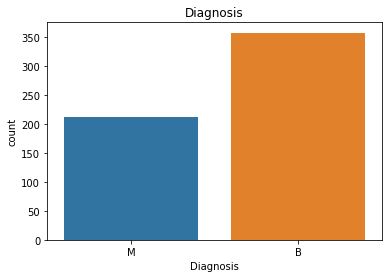

In [11]:
sns.countplot(x='Diagnosis', data=df)
plt.title("Diagnosis")
plt.show()

## Class imbalance
If you have much more data in one class than for other classes, your neural network `may` have trouble learning due to class imbalance. If this is the case your best bet is to **increase the amount of data in the misrepresented class**. However, if this is not possible you can try to **rebalance your dataset during training**. 

## Preprocessing data

Converting target (M/B) to numerical (1/0)

In [12]:
df["Diagnosis"] = df.Diagnosis.map(dict(M=1, B=0))

In [13]:
df.Diagnosis.value_counts()

0    357
1    212
Name: Diagnosis, dtype: int64

In [14]:
df.head(2)

,Diagnosis,radius (mean),texture (mean),perimeter (mean),area (mean),smoothness (mean),compactness (mean),concavity (mean),concave points (mean),symmetry (mean),fractal dimension (mean),radius (error),texture (error),perimeter (error),area (error),smoothness (error),compactness (error),concavity (error),concave points (error),symmetry (error),fractal dimension (error),radius (worst),texture (worst),perimeter (worst),area (worst),smoothness (worst),compactness (worst),concavity (worst),concave points (worst),symmetry (worst),fractal dimension (worst)
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


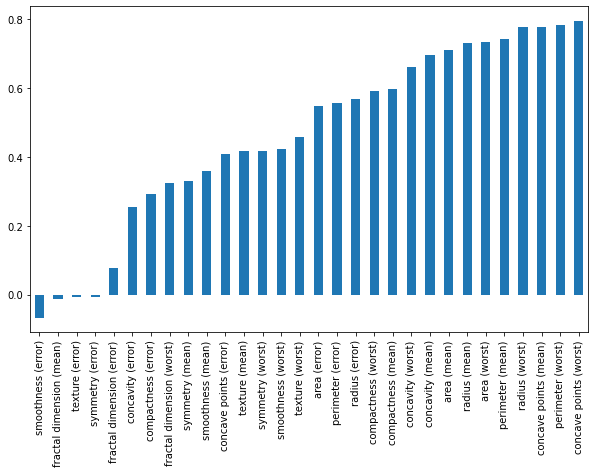

In [15]:
plt.figure(figsize=(10,6))
df.corr()['Diagnosis'][1:].sort_values().plot(kind='bar');

Converting Pandas Dataframe in numpy arrays 

In [16]:
X = df.drop('Diagnosis',axis=1).values
y = df['Diagnosis'].values
X.shape, y.shape

((569, 30), (569,))

In [17]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

Splitting Data

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.25,
                                                    random_state=101)

In [19]:
X_train.shape, X_test.shape

((426, 30), (143, 30))

Scaling data

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [21]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train.min(), X_train.max()

(0.0, 1.0)

In [23]:
X_test.min(), X_test.max()

(-0.0007963033579327511, 1.3608271267983532)

In [24]:
y_test

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1])

## Creating Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

[How to choose the number of hidden layers and nodes in a feedforward neural network?](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw)

In [26]:
input_shape = X.shape[1]

In [27]:
X.shape

(569, 30)

In [28]:
def creating_model(input_shape):
  model = Sequential()

  model.add(Dense(units=30,activation='relu', input_shape=[input_shape]))
  model.add(Dense(units=15,activation='relu'))
  model.add(Dense(units=1,activation='sigmoid'))

  # For a binary classification problem
  model.compile(loss='binary_crossentropy', 
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [29]:
model = creating_model(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [30]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=600,  
                    validation_data=(X_test, y_test),
                    verbose=1
                    )

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6813 - accuracy: 0.6761 - val_loss: 0.6610 - val_accuracy: 0.8322
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6487 - accuracy: 0.8122 - val_loss: 0.6321 - val_accuracy: 0.8462
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6193 - accuracy: 0.8685 - val_loss: 0.6029 - val_accuracy: 0.8811
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5893 - accuracy: 0.8826 - val_loss: 0.5716 - val_accuracy: 0.8951
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5555 - accuracy: 0.8803 - val_loss: 0.5366 - val_accuracy: 0.8951
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5180 - accuracy: 0.8967 - val_loss: 0.4967 - val_accuracy: 0.9021
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4771 - accuracy: 0.8944 - val_loss: 0.4535 - val_accuracy: 0.9021
Epoch 8/600


In [31]:
# summarize history for loss
def summarize_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper right')
  plt.show()

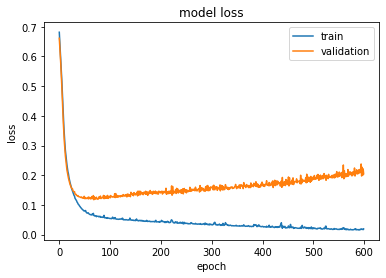

In [32]:
summarize_loss(history)

Model is overfitting

### Apply Early Stopping

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', 
                           mode='min', 
                           verbose=1, 
                           patience=25)

In [42]:
model = creating_model(input_shape)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_10 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 16        
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          #validation_split=0.1, 
          validation_data=(X_test, y_test), 
          verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.6922 - accuracy: 0.6103 - val_loss: 0.6674 - val_accuracy: 0.8252
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6589 - accuracy: 0.8146 - val_loss: 0.6371 - val_accuracy: 0.8601
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6267 - accuracy: 0.8826 - val_loss: 0.5999 - val_accuracy: 0.9161
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5848 - accuracy: 0.8826 - val_loss: 0.5568 - val_accuracy: 0.8951
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5447 - accuracy: 0.8803 - val_loss: 0.5165 - val_accuracy: 0.9231
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5010 - accuracy: 0.8944 - val_loss: 0.4696 - val_accuracy: 0.9231
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4537 - accuracy: 0.8991 - val_loss: 0.4212 - val_accuracy: 0.9371
Epoch 8/600


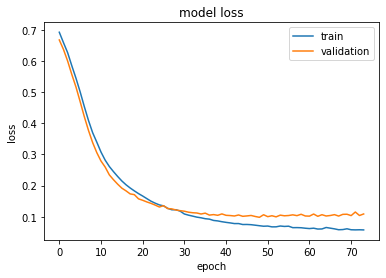

In [44]:
summarize_loss(history)

## Adding in DropOut Layers

In [51]:
def creating_model(input_shape):
  model = Sequential()

  model.add(Dense(units=30,activation='relu', input_shape=[input_shape]))
  model.add(Dropout(0.5))
  model.add(Dense(units=15,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(units=1,activation='sigmoid'))

  # For a binary classification problem
  model.compile(loss='binary_crossentropy', 
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [52]:
model = creating_model(input_shape)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 30)                930       
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 15)                465       
_________________________________________________________________
dropout_3 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 16        
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_split=0.1, 
          #validation_data=(X_test, y_test), 
          verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
12/12 [==============================] - 1s 14ms/step - loss: 0.6874 - accuracy: 0.5901 - val_loss: 0.6776 - val_accuracy: 0.6744
Epoch 2/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6715 - accuracy: 0.5979 - val_loss: 0.6564 - val_accuracy: 0.6977
Epoch 3/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6719 - accuracy: 0.6449 - val_loss: 0.6396 - val_accuracy: 0.7674
Epoch 4/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6497 - accuracy: 0.6423 - val_loss: 0.6243 - val_accuracy: 0.7907
Epoch 5/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6175 - accuracy: 0.7232 - val_loss: 0.6074 - val_accuracy: 0.8605
Epoch 6/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6246 - accuracy: 0.6997 - val_loss: 0.5894 - val_accuracy: 0.8372
Epoch 7/600
12/12 [==============================] - 0s 3ms/step - loss: 0.5922 - accuracy: 0.7467 - val_loss: 0.5721 - val_accuracy: 0.8140
Epoch 8/600


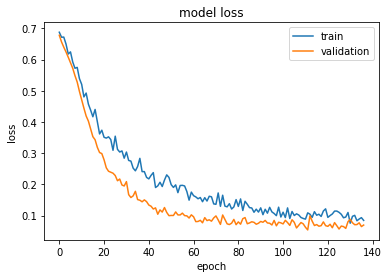

In [54]:
summarize_loss(history)

## Evaluate Model

In [55]:
_, model_accuracy = model.evaluate(X_test, y_test, verbose=0)
round (model_accuracy,2)

0.99

In [56]:
y_test.shape

(143,)

In [57]:
y_pred = model.predict(X_test)

In [58]:
y_pred[:10]

array([[8.0993772e-03],
       [9.8968148e-03],
       [5.7719946e-03],
       [9.9317408e-01],
       [3.7127733e-04],
       [6.6953897e-04],
       [4.5129657e-04],
       [9.9999833e-01],
       [2.7584732e-03],
       [2.2030473e-03]], dtype=float32)

In [59]:
y_test[:10]

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [60]:
y_pred = y_pred > 0.5

In [61]:
y_pred[:10]

array([[False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False]])

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
print(classification_report(y_test, y_pred, target_names=['B[0]', 'M[1]']))

              precision    recall  f1-score   support

        B[0]       0.99      0.99      0.99        88
        M[1]       0.98      0.98      0.98        55

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [64]:
confusion_matrix(y_test,y_pred)

array([[87,  1],
       [ 1, 54]])

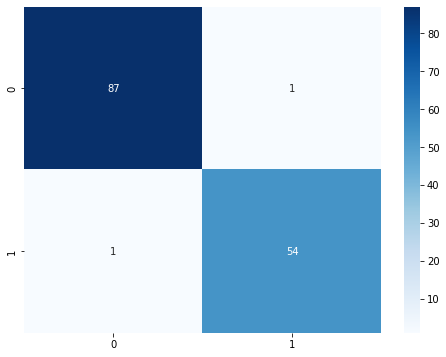

In [65]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred), cmap='Blues', annot=True, fmt='g');

# Working (during training) with Class Imbalance 

In [66]:
model = creating_model(input_shape)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 30)                930       
_________________________________________________________________
dropout_4 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 15)                465       
_________________________________________________________________
dropout_5 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 16        
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


In [85]:
from sklearn.utils.class_weight import compute_class_weight

In [87]:
np.unique(y_train)

array([0, 1])

In [90]:
class_weights = dict(enumerate(compute_class_weight('balanced', np.unique(y_train), y_train)))
class_weights

{0: 0.79182156133829, 1: 1.356687898089172}

In [91]:
history = model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_split=0.1, 
          #validation_data=(X_test, y_test), 
          verbose=1,
          class_weight=class_weights,
          callbacks=[early_stop]
          )

Epoch 1/600
12/12 [==============================] - 1s 14ms/step - loss: 0.6747 - accuracy: 0.4491 - val_loss: 0.6903 - val_accuracy: 0.3721
Epoch 2/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6793 - accuracy: 0.4935 - val_loss: 0.6812 - val_accuracy: 0.3721
Epoch 3/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6536 - accuracy: 0.5222 - val_loss: 0.6752 - val_accuracy: 0.4419
Epoch 4/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6567 - accuracy: 0.5274 - val_loss: 0.6650 - val_accuracy: 0.5116
Epoch 5/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6485 - accuracy: 0.5509 - val_loss: 0.6419 - val_accuracy: 0.6279
Epoch 6/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6292 - accuracy: 0.6084 - val_loss: 0.6203 - val_accuracy: 0.6977
Epoch 7/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6108 - accuracy: 0.6345 - val_loss: 0.5930 - val_accuracy: 0.8372
Epoch 8/600


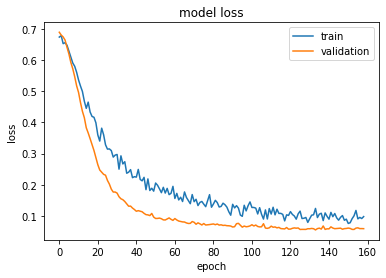

In [92]:
summarize_loss(history)

In [93]:
_, model_accuracy = model.evaluate(X_test, y_test, verbose=0)
round (model_accuracy,2)

0.97

As we can see, in this case the imbalance was not severe, and the fix did not help. Usually if we are handling with 90%/10% calss imbalance, this methodology should be mandatory.

Note: If you are handle multiclasses:


In [ ]:
class_weights = dict(
    enumerate(
        compute_class_weight(
            'balanced', 
            np.unique(np.argmax(y_train, axis=1)), 
            np.argmax(y_train, axis=1
                      )
            )
        )
    )